### Bussiness case:- Based on the given features we need to Identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided has the same structure as the real data to solve this problem.

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank to identify which customer will make transactions in future.


In [1]:
## improting the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## loading the dataset
data= pd.read_csv("train(1).csv")

In [3]:
pd.set_option('display.max_columns', None) ## to display all the columns of dataset

## Basic Checks

In [4]:
# it gives the information of rows and columns
data.shape

(200000, 202)

In [5]:
# display first five rows
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [6]:
# display last five rows
data.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,3.7574,-9.5348,13.9860,5.2982,8.2705,14.1527,7.4540,-5.0105,12.0465,8.6349,9.9137,25.1376,1.0914,3.2326,7.7802,13.9939,2.9085,0.1005,4.2369,7.5665,-9.2149,9.5746,1.4012,7.4211,11.0075,7.8080,4.5567,4.9861,9.7471,0.0722,5.9053,8.1743,10.8800,11.1665,4.2600,-2.1296,8.7833,-15.5727,-8.4916,22.1905,12.4110,15.1168,1.6041,6.1868,10.9576,18.7371,15.2986,5.7322,5.1244,9.8225,14.0315,-23.6064,-1.3403,-2.5577,6.3582,-5.4557,5.6063,7.0054,5.0171,-5.0055,28.9502,1.2297,4.4918,19.5568,20.8357,19.2136,17.6422,17.9836,4.0395,14.0761,-5.7878,16.3870,-14.1721,-13.0269,-2.5955,21.4526,15.6163,0.9845,8.2110,-0.8553,-12.1682,6.7779,7.3895,10.5084,15.5057,-0.6812,5.8999,6.1825,3.1038,-1.6930,-18.8473,9.9358,25.3359,1.3647,11.8509,5.0357,6.4630,18.4008,14.3787,19.0369,-0.6364,6.9155,3.6763,3.1460,4.9442,-1.8289,1.3521,34.6265,-0.6869,-5.3781,20.5030,10.9614,4.9677,6.1408,2.2575,12.8757,14.2253,-1.2868,0.2212,16.8661,12.7663,1.2414,7.1304,7.4108,-6.3369,3.0760,24.9796,20.3410,5.3312,23.7116,2.4745,11.2013,17.8165,13.0057,9.5506,5.3589,13.2491,-3.3068,3.6998,2.5927,14.3025,8.1596,7.9609,18.3343,4.3086,1.3546,12.4158,-5.3985,16.3683,10.4522,35.4923,5.5477,7.4244,12.5459,-6.7840,31.1895,2.6529,-11.1867,9.8865,5.4730,-5.3880,-0.4698,24.4025,-5.4493,11.3529,7.7075,-5.0491,13.0756,15.8271,3.3580,-14.3371,10.4421,7.6530,9.4585,22.7783,-4.0305,4.2233,-6.3906,13.5058,-0.4594,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,6.5576,-11.8776,14.4131,3.3087,3.5800,14.1597,7.5191,-8.8715,17.9467,17.0237,6.6459,18.2345,0.8982,2.2532,15.4977,13.3282,5.2281,-3.7424,5.5144,5.7148,-13.7470,7.4369,1.3041,12.7552,12.5362,-1.1002,2.4370,6.2631,14.8565,-2.9862,-7.8820,7.1320,11.8869,11.4218,8.9282,-27.2007,14.5962,-19.8502,26.0775,24.3915,12.6910,10.2453,6.8173,4.5666,-9.5685,18.4685,16.9534,7.3660,4.7038,9.4559,6.0037,-10.8728,0.7859,4.7000,7.8077,-1.7926,6.1534,12.9087,5.0398,-0.4247,22.6256,0.7166,0.6533,13.5821,20.3267,25.5380,14.0155,17.3326,4.2046,14.0195,11.4812,17.9954,-18.3549,-3.4537,1.1233,22.3135,1.9795,16.0239,4.7492,0.2446,-39.6406,6.9473,9.9392,11.1977,14.1006,-0.8012,18.8214,32.9827,1.7989,-0.2476,-15.5294,9.5501,11.8548,1.5127,11.3998,4.2304,6.6777,11.3434,14.2993,13.1205,13.3224,7.3143,3.6817,9.7780,4.0491,2.7221,4.4344,3.7648,2.1927,-2.9197,23.0679,12.2112,

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


info() 
* there are 200000 entries/ rows in our data.which are numbering from 0 to 199999.
* there are 202 columns in data.
* there are 200 float64 columns, 1 int64 column and 1 object column.
* and this data use the 308.2+ MB memory.
* There are non-null count of every column i.e. no null values in our data.

In [8]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

* describe() method gives statistical analysis of numerical columns in data.
* The count of each column is 200000. that is no null values in data.
* In this method we know the 25% ,50% and 75% of every feature.
* mean -- It gives the mean that is average value of feature.
* describe also gives the minimum values and the maximum values

In [9]:
#  To know the unique values in  Target column.

data['target'].unique()

array([0, 1], dtype=int64)

* The target columns contain 0 and 1 value where 0 means the customer will not do a transaction and 1 means the customer will do a transaction.
* that is there is classification task. 

In [10]:
data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

### EDA(Exploratory Data Analysis):-
* We skip EDA part in this project as feature names are not provided.

### Data Preprocessing
### Handle the null values.

In [11]:
#checking for null/missing values.

data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

* There are no missing /null values present in our data.
* So, ther is no need to handle the null values.

### Encoding
* Convert catogorical to numerical

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


* dataset have only one categorical column which is 'ID_code' 
* This column is not important for prediction it gives only indexing. So, we can drop this column.

In [13]:
# drop the ID_code column

data.drop('ID_code',axis=1,inplace=True)
data

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,1

### creating x and y variables

In [14]:
# divide the data in x and y. that is, in x store the features and in y store the target variable.
x=data.drop('target',axis=1)
y=data.target

In [15]:
x

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,12.4205,-0.1

### Principal Component Analysis (PCA)
* it dealing with large datasets, visualizing data in 2D or 3D becomes challenging due to the sheer number of features.
* PCA helps by reducing dimensions, allowing you to visualize data more effectively.

In [16]:
from sklearn.decomposition import PCA
pca= PCA()
principalComponents = pca.fit_transform(x)

In [17]:
PC_DF=pd.DataFrame(data=principalComponents,columns=[x])

In [18]:
PC_DF

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-5.606469,-23.554409,-1.899704,5.221474,2.466672,-8.622253,2.713465,-15.071818,11.416698,1.583202,-8.810643,0.802975,1.442125,12.480842,-6.771399,-15.693868,-14.050751,2.355879,-13.959337,8.161704,0.768902,1.539386,-3.140876,-3.929022,-5.044164,-2.780605,2.671855,-3.874478,0.284329,14.927178,13.744851,-14.195228,0.764528,-4.592730,6.750446,-15.644447,-0.952110,-4.722455,2.396560,7.910377,-8.339185,-2.546086,9.691300,-12.192203,0.027763,6.443053,-15.792244,1.257138,7.711555,4.302398,2.619401,-8.721261,6.255693,2.642035,4.175685,-5.215846,-4.399791,1.042272,2.968256,-3.416246,3.045450,-2.411962,7.034995,4.350953,7.637894,-3.563573,-8.958902,-6.363963,8.980502,1.649837,-7.414807,-6.579552,-2.353818,-7.007805,-1.262756,2.850301,-0.136356,-5.947943,-9.312884,7.801538,-1.258381,0.085197,6.217201,8.837776,-5.489209,5.249674,1.682748,-0.783936,-5.109001,-3.357920,-4.690509,3.031281,-1.777108,-2.129503,-2.317407,5.582199,1.919842,-0.579323,1.648996,3.402656,3.264433,2.746974,-4.206694,-5.994232,4.141584,-7.421645,2.986590,5.354213,5.415633,1.981108,5.444945,-0.995463,2.607811,2.519006,0.407317,-0.927739,0.591604,-4.146061,1.234191,3.743477,-4.096388,0.185804,-0.280838,4.424634,-4.389075,-2.755497,-0.296576,-3.827135,0.687498,-0.354272,1.720076,0.643591,-1.703633,3.149546,-3.433449,-1.102956,-0.589199,2.095379,-1.006858,-0.834961,2.168725,2.443412,1.747615,-1.136926,-0.273728,-0.584815,3.239140,-0.755615,3.072285,-1.623498,0.181888,-0.362622,-0.536328,-0.890910,2.346109,1.179376,-1.672167,2.245567,1.774314,0.991350,2.218712,-1.772632,-0.029177,-0.461014,-0.428772,0.288960,-1.124049,-0.340924,0.381717,0.425356,-1.321152,1.631939,-0.541400,0.882946,0.677493,0.478618,0.949796,0.412974,-0.284915,0.194242,-0.322464,0.655866,0.053379,-0.488668,-0.158107,0.008526,-0.200837,-0.333460,-0.018444,-0.495854,0.472871,-0.223471,0.087693,0.316206,0.036188,-0.009724,-0.133439,-0.112394,-0.210809,-0.008022
1,34.878028,11.469291,-3.759774,-19.274506,-8.543841,6.984967,-15.539528,-2.989574,8.116709,19.065200,4.791262,-11.514892,-7.972040,-16.213782,0.054853,-8.579273,8.301577,-14.261278,-0.664824,7.534936,2.165688,10.269147,-8.707106,10.308896,-3.680804,-7.131159,-10.309095,3.276040,-14.134649,1.298947,13.193734,-1.495604,3.387545,8.695409,-10.825973,-1.899904,-6.481520,-17.123284,-17.034735,15.600825,2.775892,13.517443,3.862686,3.802797,-1.228545,-11.140863,9.636516,-11.804739,2.637641,-10.004355,2.278845,-7.704922,-1.188903,-10.614767,2.577112,-8.866028,-13.174233,8.414289,-6.618041,-7.177

In [19]:
principalComponents.shape

(200000, 200)

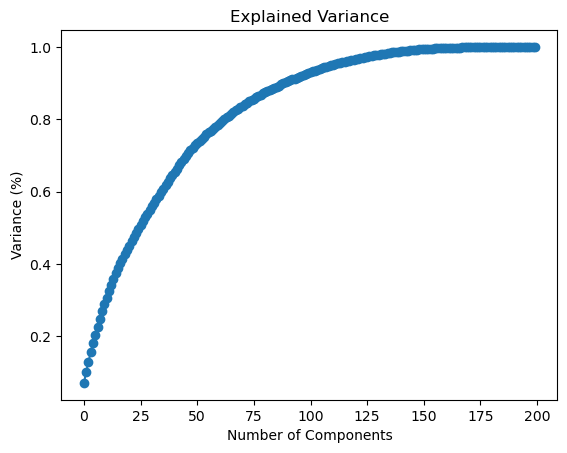

In [20]:
## getting the optimal number of pca
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')#CUMULATIVE SUM PLOT
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

* From the diagram above, it can be seen that 150 principal components explain almost 95% of the variance in data.

* So, instead of giving all the columns as input, we’d only feed these 150 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [21]:
pca = PCA(n_components=150)
new_data = pca.fit_transform(PC_DF)

In [22]:
# Generate 150 column names
column_names = [f'principal component {i+1}' for i in range(new_data.shape[1])]

In [23]:
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = [column_names])

In [24]:
PC_DF

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-5.606469,-23.554409,-1.899704,5.221474,2.466672,-8.622253,2.713465,-15.071818,11.416698,1.583202,-8.810643,0.802975,1.442125,12.480842,-6.771399,-15.693868,-14.050751,2.355879,-13.959337,8.161704,0.768902,1.539386,-3.140876,-3.929022,-5.044164,-2.780605,2.671855,-3.874478,0.284329,14.927178,13.744851,-14.195228,0.764528,-4.592730,6.750446,-15.644447,-0.952110,-4.722455,2.396560,7.910377,-8.339185,-2.546086,9.691300,-12.192203,0.027763,6.443053,-15.792244,1.257138,7.711555,4.302398,2.619401,-8.721261,6.255693,2.642035,4.175685,-5.215846,-4.399791,1.042272,2.968256,-3.416246,3.045450,-2.411962,7.034995,4.350953,7.637894,-3.563573,-8.958902,-6.363963,8.980502,1.649837,-7.414807,-6.579552,-2.353818,-7.007805,-1.262756,2.850301,-0.136356,-5.947943,-9.312884,7.801538,-1.258381,0.085197,6.217201,8.837776,-5.489209,5.249674,1.682748,-0.783936,-5.109001,-3.357920,-4.690509,3.031281,-1.777108,-2.129503,-2.317407,5.582199,1.919842,-0.579323,1.648996,3.402656,3.264433,2.746974,-4.206694,-5.994232,4.141584,-7.421645,2.986590,5.354213,5.415633,1.981108,5.444945,-0.995463,2.607811,2.519006,0.407317,-0.927739,0.591604,-4.146061,1.234191,3.743477,-4.096388,0.185804,-0.280838,4.424634,-4.389075,-2.755497,-0.296576,-3.827135,0.687498,-0.354272,1.720076,0.643591,-1.703633,3.149546,-3.433449,-1.102956,-0.589199,2.095379,-1.006858,-0.834961,2.168725,2.443412,1.747615,-1.136926,-0.273728,-0.584815,3.239140,-0.755615,3.072285,-1.623498,0.181888,-0.362622,-0.536328,-0.890910,2.346109,1.179376,-1.672167,2.245567,1.774314,0.991350,2.218712,-1.772632,-0.029177,-0.461014,-0.428772,0.288960,-1.124049,-0.340924,0.381717,0.425356,-1.321152,1.631939,-0.541400,0.882946,0.677493,0.478618,0.949796,0.412974,-0.284915,0.194242,-0.322464,0.655866,0.053379,-0.488668,-0.158107,0.008526,-0.200837,-0.333460,-0.018444,-0.495854,0.472871,-0.223471,0.087693,0.316206,0.036188,-0.009724,-0.133439,-0.112394,-0.210809,-0.008022
1,34.878028,11.469291,-3.759774,-19.274506,-8.543841,6.984967,-15.539528,-2.989574,8.116709,19.065200,4.791262,-11.514892,-7.972040,-16.213782,0.054853,-8.579273,8.301577,-14.261278,-0.664824,7.534936,2.165688,10.269147,-8.707106,10.308896,-3.680804,-7.131159,-10.309095,3.276040,-14.134649,1.298947,13.193734,-1.495604,3.387545,8.695409,-10.825973,-1.899904,-6.481520,-17.123284,-17.034735,15.600825,2.775892,13.517443,3.862686,3.802797,-1.228545,-11.140863,9.636516,-11.804739,2.637641,-10.004355,2.278845,-7.704922,-1.188903,-10.614767,2.577112,-8.866028,-13.174233,8.414289,-6.618041,-7.177

In [25]:
## new pca dataframe
principal_Df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30,principal component 31,principal component 32,principal component 33,principal component 34,principal component 35,principal component 36,principal component 37,principal component 38,principal component 39,principal component 40,principal component 41,principal component 42,principal component 43,principal component 44,principal component 45,principal component 46,principal component 47,principal component 48,principal component 49,principal component 50,principal component 51,principal component 52,principal component 53,principal component 54,principal component 55,principal component 56,principal component 57,principal component 58,principal component 59,principal component 60,principal component 61,principal component 62,principal component 63,principal component 64,principal component 65,principal component 66,principal component 67,principal component 68,principal component 69,principal component 70,principal component 71,principal component 72,principal component 73,principal component 74,principal component 75,principal component 76,principal component 77,principal component 78,principal component 79,principal component 80,principal component 81,principal component 82,principal component 83,principal component 84,principal component 85,principal component 86,principal component 87,principal component 88,principal component 89,principal component 90,principal component 91,principal component 92,principal component 93,principal component 94,principal component 95,principal component 96,principal component 97,principal component 98,principal component 99,principal component 100,principal component 101,principal component 102,principal component 103,principal component 104,principal component 105,principal component 106,principal component 107,principal component 108,principal component 109,principal component 110,principal component 111,principal component 112,principal component 113,principal component 114,principal component 115,principal component 116,principal component 117,principal component 118,principal component 119,principal component 120,principal component 121,principal component 122,principal component 123,principal component 124,principal component 125,principal component 126,principal component 127,principal component 128,principal component 129,principal component 130,principal component 131,principal component 132,principal component 133,principal component 134,principal component 135,principal component 136,principal component 137,principal component 138,principal component 139,principal component 140,principal component 141,principal component 142,principal component 143,principal component 144,principal component 145,principal component 146,principal component 147,principal component 148,principal component 149,principal component 150
0,-5.606469,-23.554409,-1.899704,5.221474,2.466672,-8.622253,2.713465,-15.071818,11.416698,1.583202,-8.810643,0.802975,1.442125,12.480842,-6.771399,-15.693868,-14.050750,2.355878,-13.959337,8.161705,0.768902,1.539386,-3.140876,-3.929021,-5.044165,-2.780605,2.671856,-3.874478,0.284328,14.927178,13.744853,-14.195229,0.764529,-4.592730,6.750447,-15.644446,-0.952110,-4.722454,2.396560,7.910378,-8.339180,-2.546084,9.691300,-12.192203,0.027762,6.443051,-15.792242,1.257135,7.711553,4.302400,2.619404,-8.721264

* Here, we see that earlier we had 200 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of features to be used for model building to 150. This is the advantage of PCA. It drastically reduces the number of features, thereby considerably reducing the training time for the model.

### Model Creation
### Prepare training and testing data.

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(principal_Df,y,test_size=0.3,random_state=4)

* we use the train_test_split function in scikit learn library from the model_selection module
* 'x' represents your features (independent variables).
* 'y' represents your target variable (dependent variable).
* test_size specifies the proportion of the dataset to include in the testing set (e.g., 0.2 for 20%).
* random_state is an optional parameter that sets the random seed for reproducibility.

In [27]:
x_train.shape

(140000, 150)

In [28]:
x_test.shape

(60000, 150)

In [29]:
y_train.shape

(140000,)

In [30]:
y_test.shape

(60000,)

### Data Balancing

In [31]:
# apply the smoting to balanced the data.
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1,k_neighbors=5)

In [32]:
x_train.shape

(140000, 150)

In [33]:
y_train.value_counts()

target
0    125919
1     14081
Name: count, dtype: int64

In [34]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [35]:
y_smote.value_counts()

target
0    125919
1    125919
Name: count, dtype: int64

In [36]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 125919, 1: 14081})
SMOTE Classes Counter({0: 125919, 1: 125919})


In [37]:
x_smote.shape

(251838, 150)

In [38]:
y_smote.shape

(251838,)

* Now the data is balanced , after applying the smoting. 

### Train the models
### 1) Logestic Regression

In [39]:
## Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_smote,y_smote)  ## training

LogisticRegression()

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score,roc_auc_score

In [41]:
## training accuracies
pred_train = clf.predict(x_smote)
print("Test AUC: {}".format(roc_auc_score(y_smote,pred_train)))
print("Test Recall: {}".format(recall_score(y_smote,pred_train)))
print("Test Precission: {}".format(precision_score(y_smote,pred_train)))
print("Test Accuracy: {}".format(accuracy_score(y_smote,pred_train)))
print("\n")

Test AUC: 0.7625298803198882
Test Recall: 0.7705667929383175
Test Precission: 0.7583767771585784
Test Accuracy: 0.7625298803198882




In [42]:
confusion_matrix(y_smote,pred_train)

array([[95005, 30914],
       [28890, 97029]], dtype=int64)

In [43]:
print(classification_report(y_smote,pred_train))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76    125919
           1       0.76      0.77      0.76    125919

    accuracy                           0.76    251838
   macro avg       0.76      0.76      0.76    251838
weighted avg       0.76      0.76      0.76    251838



In [44]:
## Testing accuracies
pred_test = clf.predict(x_test)
print("Test AUC: {}".format(roc_auc_score(y_test, pred_test)))
print("Test Recall: {}".format(recall_score(y_test, pred_test)))
print("Test Precission: {}".format(precision_score(y_test, pred_test)))
print("Test Accuracy: {}".format(accuracy_score(y_test, pred_test)))
print("\n")

Test AUC: 0.7502491251108232
Test Recall: 0.7447232840285857
Test Precission: 0.2536654401358619
Test Accuracy: 0.7546666666666667




In [45]:
confusion_matrix(y_test, pred_test)

array([[40799, 13184],
       [ 1536,  4481]], dtype=int64)

In [46]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     53983
           1       0.25      0.74      0.38      6017

    accuracy                           0.75     60000
   macro avg       0.61      0.75      0.61     60000
weighted avg       0.89      0.75      0.80     60000



### 2) RandomForest Implementation

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=100,random_state=21)
rf_clf.fit(x_smote,y_smote)

RandomForestClassifier(random_state=21)

In [48]:
## training accuracies
pred_train = clf.predict(x_smote)
print("Test AUC: {}".format(roc_auc_score(y_smote,pred_train)))
print("Test Recall: {}".format(recall_score(y_smote,pred_train)))
print("Test Precission: {}".format(precision_score(y_smote,pred_train)))
print("Test Accuracy: {}".format(accuracy_score(y_smote,pred_train)))
print("\n")

Test AUC: 0.7625298803198882
Test Recall: 0.7705667929383175
Test Precission: 0.7583767771585784
Test Accuracy: 0.7625298803198882




In [49]:
confusion_matrix(y_smote,pred_train)

array([[95005, 30914],
       [28890, 97029]], dtype=int64)

In [50]:
print(classification_report(y_smote,pred_train))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76    125919
           1       0.76      0.77      0.76    125919

    accuracy                           0.76    251838
   macro avg       0.76      0.76      0.76    251838
weighted avg       0.76      0.76      0.76    251838



In [51]:
## Testing accuracies
pred_test = clf.predict(x_test)
print("Test AUC: {}".format(roc_auc_score(y_test, pred_test)))
print("Test Recall: {}".format(recall_score(y_test, pred_test)))
print("Test Precission: {}".format(precision_score(y_test, pred_test)))
print("Test Accuracy: {}".format(accuracy_score(y_test, pred_test)))
print("\n")

Test AUC: 0.7502491251108232
Test Recall: 0.7447232840285857
Test Precission: 0.2536654401358619
Test Accuracy: 0.7546666666666667




In [52]:
confusion_matrix(y_test, pred_test)

array([[40799, 13184],
       [ 1536,  4481]], dtype=int64)

In [53]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     53983
           1       0.25      0.74      0.38      6017

    accuracy                           0.75     60000
   macro avg       0.61      0.75      0.61     60000
weighted avg       0.89      0.75      0.80     60000



## xgboost

In [54]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb=XGBClassifier() ## object creation
xgb.fit(x_smote,y_smote)# fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
## training accuracies
pred_train = xgb.predict(x_smote)
print("Test AUC: {}".format(roc_auc_score(y_smote,pred_train)))
print("Test Recall: {}".format(recall_score(y_smote,pred_train)))
print("Test Precission: {}".format(precision_score(y_smote,pred_train)))
print("Test Accuracy: {}".format(accuracy_score(y_smote,pred_train)))
print("\n")

Test AUC: 0.9249080758265235
Test Recall: 0.9229981178376575
Test Precission: 0.9265374129051802
Test Accuracy: 0.9249080758265233




In [56]:
confusion_matrix(y_smote,pred_train)

array([[116704,   9215],
       [  9696, 116223]], dtype=int64)

In [57]:
print(classification_report(y_smote,pred_train))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93    125919
           1       0.93      0.92      0.92    125919

    accuracy                           0.92    251838
   macro avg       0.92      0.92      0.92    251838
weighted avg       0.92      0.92      0.92    251838



In [58]:
## Testing accuracies
pred_test = xgb.predict(x_test)
print("Test AUC: {}".format(roc_auc_score(y_test, pred_test)))
print("Test Recall: {}".format(recall_score(y_test, pred_test)))
print("Test Precission: {}".format(precision_score(y_test, pred_test)))
print("Test Accuracy: {}".format(accuracy_score(y_test, pred_test)))
print("\n")

Test AUC: 0.593718901115593
Test Recall: 0.29732424796410173
Test Precission: 0.23170573759875665
Test Accuracy: 0.8306666666666667




In [59]:
confusion_matrix(y_test, pred_test)

array([[48051,  5932],
       [ 4228,  1789]], dtype=int64)

In [60]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     53983
           1       0.23      0.30      0.26      6017

    accuracy                           0.83     60000
   macro avg       0.58      0.59      0.58     60000
weighted avg       0.85      0.83      0.84     60000



## DecisionTree 

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier() ## object creation
dt.fit(x_smote,y_smote) ## fitting the data

DecisionTreeClassifier()

In [62]:
## training accuracies
pred_train = dt.predict(x_smote)
print("Test AUC: {}".format(roc_auc_score(y_smote,pred_train)))
print("Test Recall: {}".format(recall_score(y_smote,pred_train)))
print("Test Precission: {}".format(precision_score(y_smote,pred_train)))
print("Test Accuracy: {}".format(accuracy_score(y_smote,pred_train)))
print("\n")

Test AUC: 1.0
Test Recall: 1.0
Test Precission: 1.0
Test Accuracy: 1.0




In [63]:
confusion_matrix(y_smote,pred_train)

array([[125919,      0],
       [     0, 125919]], dtype=int64)

In [64]:
print(classification_report(y_smote,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    125919
           1       1.00      1.00      1.00    125919

    accuracy                           1.00    251838
   macro avg       1.00      1.00      1.00    251838
weighted avg       1.00      1.00      1.00    251838



In [65]:
## Testing accuracies
pred_test = dt.predict(x_test)
print("Test AUC: {}".format(roc_auc_score(y_test, pred_test)))
print("Test Recall: {}".format(recall_score(y_test, pred_test)))
print("Test Precission: {}".format(precision_score(y_test, pred_test)))
print("Test Accuracy: {}".format(accuracy_score(y_test, pred_test)))
print("\n")

Test AUC: 0.5311445818579879
Test Recall: 0.3202592654146585
Test Precission: 0.12155427994701318
Test Accuracy: 0.6997333333333333




In [66]:
confusion_matrix(y_test, pred_test)

array([[40057, 13926],
       [ 4090,  1927]], dtype=int64)

In [67]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82     53983
           1       0.12      0.32      0.18      6017

    accuracy                           0.70     60000
   macro avg       0.51      0.53      0.50     60000
weighted avg       0.83      0.70      0.75     60000



## SVM

In [79]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_smote,y_smote)

SVC()

In [80]:
## training accuracies
pred_train = svc.predict(x_smote)
print("Test AUC: {}".format(roc_auc_score(y_smote,pred_train)))
print("Test Recall: {}".format(recall_score(y_smote,pred_train)))
print("Test Precission: {}".format(precision_score(y_smote,pred_train)))
print("Test Accuracy: {}".format(accuracy_score(y_smote,pred_train)))
print("\n")

Test AUC: 0.9824847719565752
Test Recall: 0.9873887181442038
Test Precission: 0.9777985749563521
Test Accuracy: 0.9824847719565752




In [81]:
confusion_matrix(y_smote,pred_train)

array([[123096,   2823],
       [  1588, 124331]], dtype=int64)

In [82]:
print(classification_report(y_smote,pred_train))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    125919
           1       0.98      0.99      0.98    125919

    accuracy                           0.98    251838
   macro avg       0.98      0.98      0.98    251838
weighted avg       0.98      0.98      0.98    251838



In [83]:
## Testing accuracies
pred_test = svc.predict(x_test)
print("Test AUC: {}".format(roc_auc_score(y_test, pred_test)))
print("Test Recall: {}".format(recall_score(y_test, pred_test)))
print("Test Precission: {}".format(precision_score(y_test, pred_test)))
print("Test Accuracy: {}".format(accuracy_score(y_test, pred_test)))
print("\n")

Test AUC: 0.5998909747933959
Test Recall: 0.2539471497423965
Test Precission: 0.34321653189577717
Test Accuracy: 0.87645




In [84]:
confusion_matrix(y_test, pred_test)

array([[51059,  2924],
       [ 4489,  1528]], dtype=int64)

In [85]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     53983
           1       0.34      0.25      0.29      6017

    accuracy                           0.88     60000
   macro avg       0.63      0.60      0.61     60000
weighted avg       0.86      0.88      0.87     60000



### Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB() ## object creation
nb.fit(x_smote, y_smote)

GaussianNB()

In [69]:
## training accuracies
pred_train = nb.predict(x_smote)
print("Test AUC: {}".format(roc_auc_score(y_smote,pred_train)))
print("Test Recall: {}".format(recall_score(y_smote,pred_train)))
print("Test Precission: {}".format(precision_score(y_smote,pred_train)))
print("Test Accuracy: {}".format(accuracy_score(y_smote,pred_train)))
print("\n")

Test AUC: 0.8511265178408342
Test Recall: 0.7748949721646455
Test Precission: 0.9142905332596208
Test Accuracy: 0.8511265178408342




In [70]:
confusion_matrix(y_smote,pred_train)

array([[116772,   9147],
       [ 28345,  97574]], dtype=int64)

In [71]:
print(classification_report(y_smote,pred_train))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86    125919
           1       0.91      0.77      0.84    125919

    accuracy                           0.85    251838
   macro avg       0.86      0.85      0.85    251838
weighted avg       0.86      0.85      0.85    251838



In [72]:
## Testing accuracies
pred_test = nb.predict(x_test)
print("Test AUC: {}".format(roc_auc_score(y_test, pred_test)))
print("Test Recall: {}".format(recall_score(y_test, pred_test)))
print("Test Precission: {}".format(precision_score(y_test, pred_test)))
print("Test Accuracy: {}".format(accuracy_score(y_test, pred_test)))
print("\n")

Test AUC: 0.5154220695931793
Test Recall: 0.10553431942828652
Test Precission: 0.13606170987786587
Test Accuracy: 0.8431




In [73]:
confusion_matrix(y_test, pred_test)

array([[49951,  4032],
       [ 5382,   635]], dtype=int64)

In [74]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     53983
           1       0.14      0.11      0.12      6017

    accuracy                           0.84     60000
   macro avg       0.52      0.52      0.52     60000
weighted avg       0.83      0.84      0.83     60000



### CV

In [75]:
## checking cross validation score to check the avg performance of our model
from sklearn.model_selection import cross_val_score,StratifiedKFold

scores = cross_val_score(xgb,x,y,cv=5,scoring='f1')

print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.37422643 0.35298466 0.37384532 0.35268346 0.37123563]
Cross validation Score: 0.3649950991282121
Std : 0.009983136429794441


In [76]:
sk=  StratifiedKFold(n_splits=5,shuffle=True,random_state=10)


scores = cross_val_score(xgb,x,y,cv=sk,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.36390262 0.35802242 0.37384196 0.36891794 0.37803552]
Cross validation Score: 0.3685440918944878
Std : 0.00707874579170208


### Model comparison report

In [86]:
dfr = pd.DataFrame()
dfr['Model'] = ['Logestic Regression','Random Forest','XGBoost','Decision tree','SVM','Naive Bayes']
dfr['Accuracy_score'] = [0.75,0.75,0.83,0.69,0.87,0.84]
dfr

,Model,Accuracy_score
0,Logestic Regression,0.75
1,Random Forest,0.75
2,XGBoost,0.83
3,Decision tree,0.69
4,SVM,0.87
5,Naive Bayes,0.84


* SVM is the Best model for prediction.

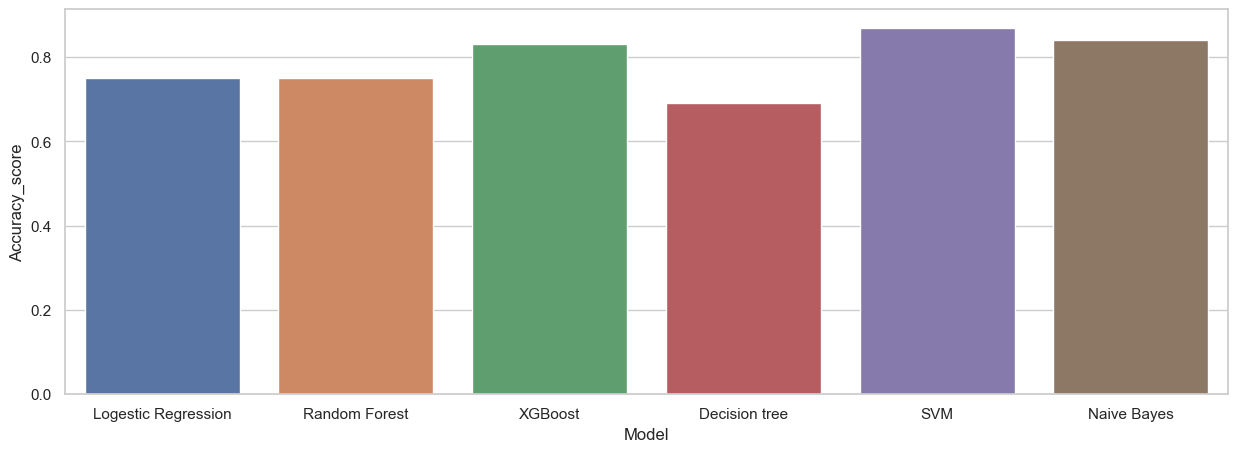

In [87]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.set(style= 'whitegrid')
ax=sns.barplot(x='Model',y='Accuracy_score',data=dfr)

### Report on Challenges faced

problems we faces while working on this project
* The models was taking a lot of time because our dataset had a lot of rows and columns.
* Facing issue in increasing accuracy 
* we still imporve the model with a bit a hyperparameter tuning of the SVM model and also we will try some deep learning model so that it can help us in getting a better score.